In [ ]:
# copyright: https://github.com/enesozeren/machine_learning_from_scratch/blob/main/decision_trees/decision_tree.py
# for personal study purposes only

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt

from decision_tree import DecisionTree
from random_forest import RandomForestClassifier

## Prepare Datasets

In [3]:
# iris

def iris():

    iris = datasets.load_iris()

    X, Y = np.array(iris.data), np.array(iris.target)
    feature_names = iris.feature_names

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

    return X_train, X_test, Y_train, Y_test, feature_names

In [4]:
# self-created toy volleyball datasets

def volleyball():
    N = 5000
    x1 = np.random.normal(loc=1.85, scale=0.2, size=N) # height (in m)
    x2 = np.random.normal(loc=3.3, scale=0.2, size=N) # vertical (in m)
    x3 = np.random.normal(loc=0, scale=0.1, size=N) # useless feature
    X = np.column_stack((x1, x2, x3))

    feature_names = ['height', 'vertical', 'useless feature']

    Y = (x1 > 1.9) & (x2 > 3.5) # Y = 1 if volleyball middle player 0 else
    percetage_to_flip = 0.2
    idx_to_flip = np.random.uniform(0, 1, size=N) < 0.2
    Y[idx_to_flip] = 1 - Y[idx_to_flip] # randomly flip out some values in y

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

    return X_train, X_test, Y_train, Y_test, feature_names
    

## DecisionTree

0.9732142857142857 0.9210526315789473


<BarContainer object of 4 artists>

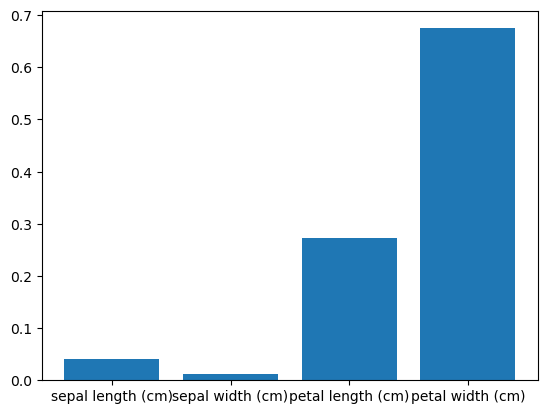

In [26]:
X_train, X_test, Y_train, Y_test, feature_names = iris()

tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
tree.fit(X_train, Y_train)

print(
    sum(tree.predict(X_train) == Y_train) / len(Y_train),
    sum(tree.predict(X_test) == Y_test) / len(Y_test),
)

plt.bar(
    range(len(tree.feature_importances)),
    list(tree.feature_importances.values()),
    tick_label=feature_names,
)

0.8 0.7872


<BarContainer object of 3 artists>

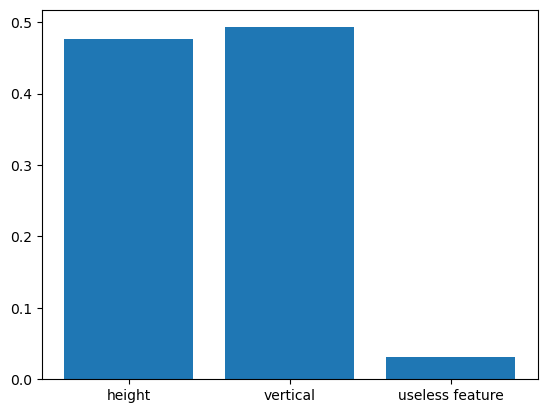

In [27]:

X_train, X_test, Y_train, Y_test, feature_names = volleyball()


tree = DecisionTree()
tree.fit(X_train, Y_train)

print(
    sum(tree.predict(X_train) == Y_train) / len(Y_train),
    sum(tree.predict(X_test) == Y_test) / len(Y_test),
)

plt.bar(
    range(len(tree.feature_importances)),
    list(tree.feature_importances.values()),
    tick_label=feature_names,
)



## Random Forest

1.0 0.9736842105263158


<BarContainer object of 4 artists>

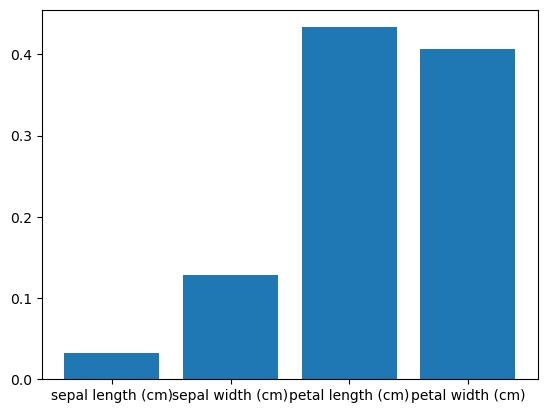

In [10]:
X_train, X_test, Y_train, Y_test, feature_names = iris()

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)


print(
    sum(rf.predict(X_train) == Y_train) / len(Y_train),
    sum(rf.predict(X_test) == Y_test) / len(Y_test),
)

plt.bar(
    range(len(rf.feature_importances)),
    rf.feature_importances,
    tick_label=feature_names,
)

0.7952 0.8144


<BarContainer object of 3 artists>

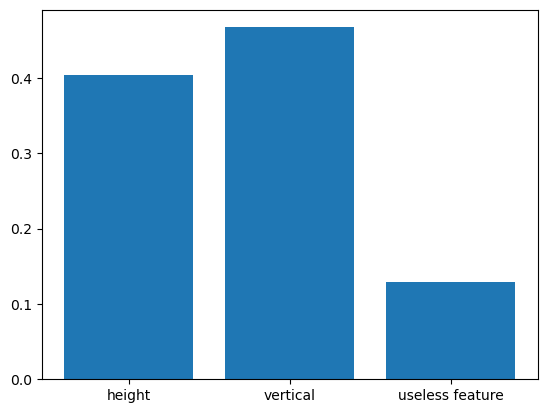

In [11]:
X_train, X_test, Y_train, Y_test, feature_names = volleyball()

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)


print(
    sum(rf.predict(X_train) == Y_train) / len(Y_train),
    sum(rf.predict(X_test) == Y_test) / len(Y_test),
)

plt.bar(
    range(len(rf.feature_importances)),
    rf.feature_importances,
    tick_label=feature_names,
)